#### Projeto - Analisando o resultados de testes A/B
#### Curso - Fundamentos de Data Science II

#### Aluno Leandro Baruch 

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [30]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Verifying the number os rows in the dataset
print(("The number of rows in our dataset is {}.").format(df.shape[0]))

The number of rows in our dataset is 294478.


c. The number of unique users in the dataset.

In [4]:
#Verifying unique users
print(("The number of unique users in our dataset is {}.").format(df['user_id'].nunique()))

The number of unique users in our dataset is 290584.


d. The proportion of users converted.

In [5]:
#Verifying the proportion of converted users
print(("The proportion of users converted is {}.").format(df['converted'].mean()))

The proportion of users converted is 0.11965919355605512.


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Verifying the number of times the new_page and treatment don't line up.
print(("The number of times the new_page and treatment don't line up is {}").format(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]))

The number of times the new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

**No.**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [7]:
#Creating a new dataframe considering only rows that treatment are lining up with new page and control are lining up with old page
df2 = df.query("(group == 'treatment' and landing_page == 'new_page') or (group == 'control' and landing_page == 'old_page')")
df2.reset_index(drop=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [8]:
#Verifying quantity of rows in the new dataset
print(("The number of rows in our new dataset is {}.").format(df2.shape[0]))

The number of rows in our new dataset is 290585.


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Verirying unique users
print(("The number of unique users in our new dataset is {}.").format(df2['user_id'].nunique()))

The number of unique users in our new dataset is 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Verifying ammount of repeated user_id.
df2['user_id'].value_counts() 

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#Verifying row informations of the repeated user_id (773192)
df2.query("user_id == '773192'")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Droping the second line of the repeated user
df2.drop_duplicates('user_id', keep='first', inplace=True)

C:\Users\baruch\Anaconda3\envs\projeto2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#Validate the solution
df2.query("user_id == '773192'")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
print(("The probability of an individual converting regardless of the page they receive is {}.").format(df2['converted'].mean()))

The probability of an individual converting regardless of the page they receive is 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
group_control = df2.query("group == 'control'")
print(("The probability of an individual from the control group converting is {}.".format(group_control['converted'].mean())))

The probability of an individual from the control group converting is 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment_control = df2.query("group == 'treatment'")
print(("The probability of an individual from the treatment group converting is {}.".format(treatment_control['converted'].mean())))

The probability of an individual from the treatment group converting is 0.11880806551510564.


d. What is the probability that an individual received the new page?

In [18]:
print(("The probability that an individual received the new page is {}.").format(df2['landing_page'].value_counts(1)[0]))

The probability that an individual received the new page is 0.5000619442226688.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There is no sufficient evidence. Actually, considering the results above the says otherwise. We have to dig further.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{new} - P_{old} \leq 0 $$
$$H_1: P_{new} - P_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [19]:
#Creation of different dataframes to separate the groups treatment and control. Then checking the conversion rate and accouting 
# the difference in obs_diff

treat_group = df2.query("group == 'treatment'") 
control_group = df2.query("group == 'control'")
treat_conv = treat_group.query('converted == "1"').count()[0] / treat_group.query('converted == "0"').count()[0]
control_conv = control_group.query('converted == "1"').count()[0] / control_group.query('converted == "0"').count()[0]

obs_diff = treat_conv - control_conv
obs_diff

-0.002036152355059301

In [20]:
#Create a sampling distribution of the difference in proportions with bootstrapping
diffs= []
size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    treat_group = b_samp.query("group == 'treatment'") 
    control_group = b_samp.query("group == 'control'")
    treat_conv = treat_group.query('converted == "1"').count()[0] / treat_group.query('converted == "0"').count()[0]
    control_conv = control_group.query('converted == "1"').count()[0] / control_group.query('converted == "0"').count()[0]
    diffs.append(treat_conv - control_conv)

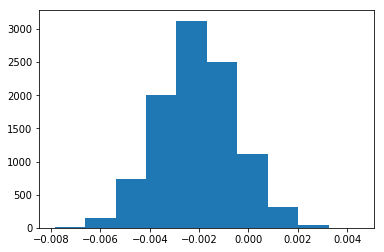

In [21]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

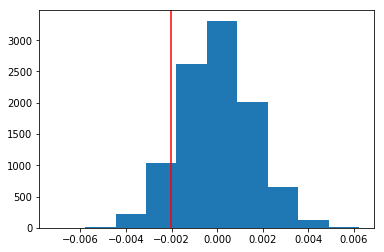

In [22]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution with observed statistic
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')


In [23]:
# Compute p-value
(null_vals > obs_diff).mean()

0.9059

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#Convert rate for p_new under the null and storing it in p_new
print(("The converted rate for p_new under the null is {}").format(treat_conv))
p_new = treat_conv

The converted rate for p_new under the null is 0.13482654670977617


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#Convert rate for p_old under the null and storing it in p_old
print(("The converted rate for p_old under the null is {}.").format(control_conv))
p_old = control_conv

The converted rate for p_old under the null is 0.13686269906483547.


c. What is $n_{new}$?

In [22]:
#Number of n in df2 and storing it in n_new
print(("The value o n_new is {}.").format(df2[((df2['landing_page'] == 'new_page')) == True].shape[0]))
n_new = df2[((df2['landing_page'] == 'new_page')) == True].shape[0]

The value o n_new is 145310.


d. What is $n_{old}$?

In [23]:
#Number of n in df2 and storing it in n_old
print(("The value o n_old is {}.").format(df2[((df2['landing_page'] == 'old_page')) == True].shape[0]))
n_old = df2[((df2['landing_page'] == 'old_page')) == True].shape[0]

The value o n_old is 145274.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, p_new,n_new)
new_page_mean = new_page_converted.mean()
new_page_mean

0.13471887688390338

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_mean = old_page_converted.mean()
old_page_mean

0.1372303371559949

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_diff = new_page_converted.mean() - old_page_converted.mean()
new_diff

-0.002511460272091509

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [58]:
#Create a sampling distribution of the difference in proportions with bootstrapping
p_diffs= []
size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    treat_group = b_samp.query("group == 'treatment'") 
    control_group = b_samp.query("group == 'control'")
    new_page_mean = treat_group.query('converted == "1"').count()[0] / treat_group.query('converted == "0"').count()[0]
    old_page_mean = control_group.query('converted == "1"').count()[0] / control_group.query('converted == "0"').count()[0]
    p_diffs.append(new_page_mean - old_page_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

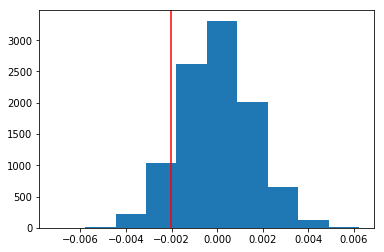

In [66]:
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

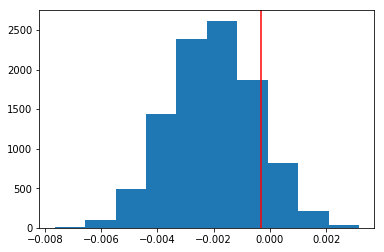

In [60]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

# Plot sampling distribution
plt.hist(p_diffs);
plt.axvline(new_diff, c='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [65]:
diff_difference = p_diffs / diffs
print(("p_diff is {} greater than diffs.").format(diff_difference.mean()))

p_diff is 1.5343879931995401 greater than diffs.


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Both results are near the 0.00 and both are negatives which indicate we should fail in reject the null hypotheses.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm
#convert_old =
#convert_new =
print(("Value of p_old {}").format(p_old))
print(("Value of p_new {}").format(p_new))
print(("Value of n_old {}").format(n_old))
print(("Value of n_new {}").format(n_new))

print(("The ammount of individuals who received the old_page is {} and from those, {} were converted.").format(n_old, int((n_old * p_old))))
print(("The ammount of individuals who received the new_page is {} and from those, {} were converted.").format(n_new, int((n_new * p_new))))


Value of p_old 0.13686269906483547
Value of p_new 0.13482654670977617
Value of n_old 145274
Value of n_new 145310
The ammount of individuals who received the old_page is 145274 and from those, 19882 were converted.
The ammount of individuals who received the new_page is 145310 and from those, 19591 were converted.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([19995, 19667], [145274, 145310])
print(("z_score:{}").format(z_score))
print(("p_value:{}").format(p_value))

z_score:1.7989156365484442
p_value:0.07203202673287003


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [33]:
from scipy.stats import norm

norm.cdf(z_score)
norm.ppf(1-(0.05/2))

1.959963984540054

**Since our z_score didnt exceed our critical value of `1.9599`, we fail in reject the null hipoteses.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should use Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [28]:
df2['intercept'] = 1
page_dummies = pd.get_dummies(df2['landing_page'])
df2 = df2.join(page_dummies)
df2.head()

C:\Users\baruch\Anaconda3\envs\projeto2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [40]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'old_page']])

results=lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        23:04:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
old_page       0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The new `p_value is 0.190`. The explanation for that is because in Part II, we had a one tail hypotheses which means we were looking to $H_1$ only to one side, in other words, we are expecting it be higher the $H_0$.
In Part III, however, using Logistic Regression, we have a two tail hypotheses, so $H_1$ could be higher or lower than $H_0$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is important to add other factors because as much information we have, more accuracy we will have in our answer. But we have to analyse it carefully to guarantee that we do not have the _`Curse of Dimensionality`_, which means a dataset with much more factors than necessary. There is cases that some informations can confuse the results, those cases we call _`confounding`_. It means there is a variable taht influences both the dependent and independent variables, causing a false association. When it happens, we have to drop this variable.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [37]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])
df_new = df_new.join(country_dummies)
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'old_page', 'UK', 'US']])

results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        23:05:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
old_page       0.0149      0.011      1.307      0.191      -0.007       0.037
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [43]:
np.exp(0.0506), np.exp(0.0408)

(1.0519020483004984, 1.0416437559600236)

**The `p_value`from countries are accepted. Also we can see that conversion from UK is the highest followed by US. That doesn't say much since the contribution of those variables are not significant.
With that in mind, the effort of time and money to create and put in production the new website is not worth.
Still, if the numbers of the actual website is not achieving the purpose, we should look to the new concept and improve it in order to get better results in the next test.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.